## 라이브러리 불러오기

In [2]:
# 데이터 분석을 위해 pandas 불러오기
import pandas as pd

In [ ]:
# colab 을 사용한다면 런타임이 초기화 될때마다 다시 설치해 주어야 합니다.
# 로컬 컴퓨터에 설치했다면 이전에 설치된 라이브러리를 사용해 주시면 됩니다.
# !pip install -U finance-datareader

In [4]:
# FinanceDataReader 를 fdr 별칭으로 가져오기
import FinanceDataReader as fdr

## 개별 종목의 일별 시세 수집
- 종목코드로 수집이 가능합니다.
- 종목명을 찾아서 일별 시세를 수집해 주는 함수를 만들어 볼 예정입니다.

In [11]:
# 삼성전자, 2017년~현재 일별 시세 받아오기
# 삼성전자의 종목 번호 '005930'

df = fdr.DataReader("005930","2017","2021") # 2017년 부터 2021년 기간을 정해 줄 수 있다.
df.head()
# close = 종가 , volume = 거래량, change = 전일대비

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-01-02,35980,36240,35880,36100,93012,0.001665
2017-01-03,36280,36620,36020,36480,147153,0.010526
2017-01-04,36500,36520,36100,36160,159435,-0.008772
2017-01-05,36060,36060,35540,35560,219349,-0.016593
2017-01-06,36180,36440,36040,36200,177619,0.017998


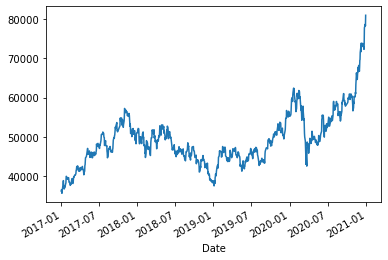

In [13]:
# 종가 시각화 하기
df["Close"].plot()

## 상장종목 목록 가져오기

In [17]:
# 이전 강의에서 저장해 놓았던 csv 파일로 분석을 합니다.
# colab 사용자의 경우 이미 csv 파일이 지워졌을 수 있기 때문에 파일이 없을 경우 아래 셀에서 다시 load하면 됩니다.
df_krx = pd.read_csv("krx.csv")
df_krx.shape

(2614, 10)

In [ ]:
# 위 CSV 파일이 로드되지 않아 당황스러우신가요? 그럼 아래 주석을 풀고 다시 KRX 데이터를 받아오세요.
# colab의 경우 일정 시간이 지나면 런타임이 초기화 되기 때문에 다시 로드하면 데이터를 가져올 수 있습니다.
# df_krx = fdr.StockListing('KRX')

## 상장종목 목록 사용하기
- 종목명과 심볼을 찾기 위해 상장종목 목록을 사용합니다.

In [20]:
# DataFrame 에 어떤 데이터가 들어있는 head()로 일부 데이터만 가져와 봅니다.
df_krx[["Symbol","Name"]].head()

,Symbol,Name
0,060310,3S
1,095570,AJ네트웍스
2,006840,AK홀딩스
3,054620,APS홀딩스
4,265520,AP시스템


In [28]:
# df_krx의 Name column 에서 '빅히트'에 해당하는 row를 전부 가져오는데 Name column만 가져와
# list 형태로 index 번호는 빼고 ['빅히트'] 만 가져오게 되고 [0]을 통해 list에 있는 string만 가져오게 됩니다.
# 빅히트 (series) -> ['빅히트'] (list) -> '빅히트' (string)
# tolist를 써서 인덱스 값이 빠지고 value 값만 남았다. [0] 을 써서 리스트형식을 스트링 형식으로 
item_name = "빅히트"
df_krx.loc[df_krx["Name"]==item_name,"Symbol"].tolist()[0] 

'352820'

In [37]:
# '히트'라는 이름을 가진 상장사가 있는지 확인해 보기
# df_krx.loc[df_krx["Name"]=="히트","Symbol"].tolist()[0] 

## 종목명으로 종목 코드를 받아오는 함수 만들기

In [43]:
# 종목명으로 종목코드 받아오는 함수 만들기
# df_krx의 Name column에서 같은 값이 있으면 
# row의 Symbol column의 값을 list로 name_list에 저장하기
# item_code_by_item_name 함수를 만듭니다.
# def item_code_by_item_name(item_name):
# 예외처리 필요
def item_code_by_item_name(item_name):
    """
    종목명을 받아 종목코드를 찾아 반환하는 함수
    """
    item_code_list = df_krx.loc[df_krx["Name"]==item_name,"Symbol"].tolist() 
    if len(item_code_list) >0:
        item_code = item_code_list[0]
        return item_code
    else:
        return False

In [44]:
item_code_by_item_name("빅히트")

'352820'

In [45]:
# 네이버로 등록된 상장사는 없습니다.
# 잘못 입력된 텍스트에 대해 예외처리를 하는지 확인합니다.
item_code_by_item_name("네이버")

False

In [46]:
# 네이버는 NAVER로 등록되어 있습니다.
item_code_by_item_name("NAVER")

'035420'

In [47]:
# 삼성전자
item_code_by_item_name("삼성전자")

'005930'

In [48]:
# 셀트리온과 카카오게임즈도 확인하여 봅니다.
item_code_by_item_name("셀트리온")

'068270'

In [50]:
item_code_by_item_name("카카오게임즈")

'293490'

In [52]:
# fdr.DataReader(item_code_by_item_name("LG화학"))

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2001-04-25,20621,20621,17563,18489,3094940,NaN
2001-04-26,17918,18416,17492,17636,1197840,-0.046136
2001-04-27,17280,18204,17066,18062,854340,0.024155
2001-04-30,17706,18275,17706,18204,803230,0.007862
2001-05-02,18345,18843,17990,18489,851580,0.015656
...,...,...,...,...,...,...
2021-01-18,958000,990000,943000,964000,423917,-0.015322
2021-01-19,983000,1003000,970000,997000,386045,0.034232
2021-01-20,1004000,1010000,983000,1000000,360937,0.003009


## 종목명으로 일별시세를 받아오는 함수 만들기¶

In [73]:
# item_code_by_item_name : 종목명으로 종목번호 가져오기
# find_item_list : 종목번호로 해당연도 데이터 가져오기
# find_item_list는 year 값이 없으면 기본으로 2020년 데이터를 선택

def find_item_list(item_name, year=2020):
    """
    종목명을 넘겨주면 일별시세를 반환하는 함수
    내부에서 종목명으로 종목코드를 반환하는 함수(item_code_by_item_name)로
    종목의 시세를 수집합니다.
    """
    item_code = item_code_by_item_name(item_name)
    if item_code:
        df_day = fdr.DataReader(item_code,str(year))
        return df_day
    else:
        return False

In [74]:
# 위에 함수 year이 적용이 안되는데 str(year) 형식으로 만들어주면 적용됨.
find_item_list("삼성")

False

## 종목명으로 일별 시세를 잘 가져오는지 확인하기

In [75]:
# LG화학의 데이터를 가져옵니다.
find_item_list("LG화학")

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,321000,321000,313500,314000,139496,-0.011024
2020-01-03,317000,318500,310500,311000,165030,-0.009554
2020-01-06,308000,311000,306500,307000,138154,-0.012862
2020-01-07,306000,313500,305000,311000,133788,0.013029
2020-01-08,306000,307000,301500,302000,225471,-0.028939
...,...,...,...,...,...,...
2021-01-18,958000,990000,943000,964000,423917,-0.015322
2021-01-19,983000,1003000,970000,997000,386045,0.034232
2021-01-20,1004000,1010000,983000,1000000,360937,0.003009


In [78]:
# 빅히트의 데이터를 가져옵니다.
# stock_daily 변수에 담습니다.
stock_daily = find_item_list("빅히트")
stock_daily

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-10-15,270000,351000,253500,258000,6557212,NaN
2020-10-16,253000,253000,199000,200500,4504395,-0.222868
2020-10-19,198500,202500,187000,189000,1977996,-0.057357
2020-10-20,190000,193500,176000,182500,1811616,-0.034392
2020-10-21,180500,185500,177000,179000,1658643,-0.019178
...,...,...,...,...,...,...
2021-01-18,156000,168500,154500,165500,630687,0.054140
2021-01-19,168000,174500,167000,173500,459733,0.048338
2021-01-20,174000,177000,169000,176000,423998,0.014409


## 개별종목 시세 시각화
### pandas 의 plot으로 시각화 하기

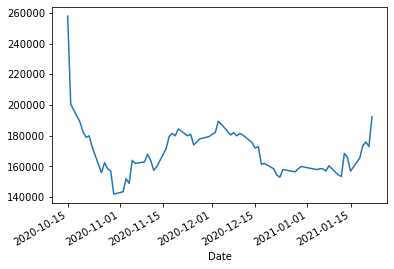

In [80]:
# stock_daily 변수에 할당된 수집된 데이터의 종가 그래프를 그립니다.
stock_daily["Close"].plot()

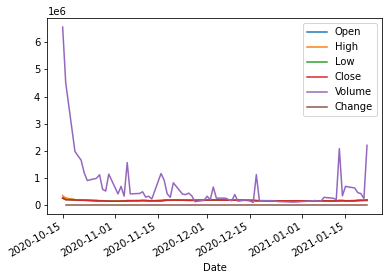

In [81]:
# 전체 데이터프레임을 plot() 으로 시각화 하면 수치 데이터 전체를 선그래프로 그립니다.
stock_daily.plot()

## 서브플롯 그리기

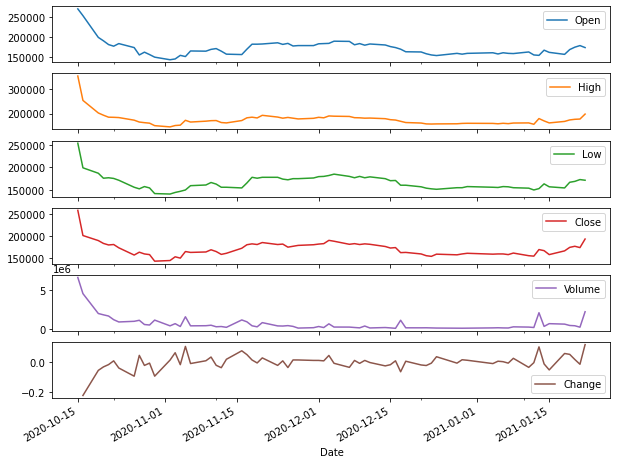

In [86]:
# 수집한 종목의 선그래프를 Pandas 로 그립니다.
# 스케일이 다르기 때문에 subplots를 사용해 그려봅니다.
g = stock_daily.plot(subplots=True,figsize=(10,8))

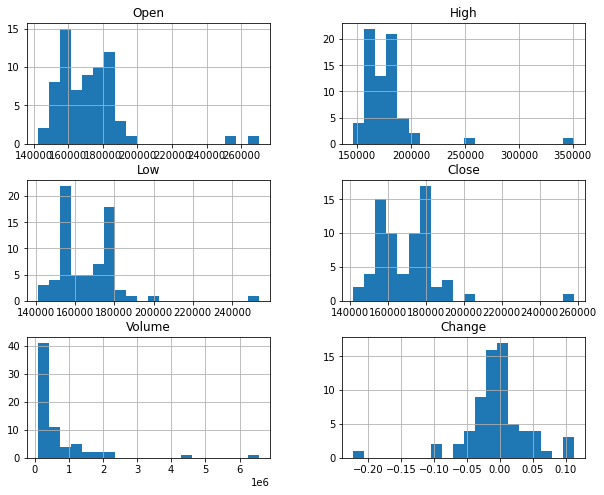

In [90]:
# 히스토그램 그리기
# 변수를 담아주는 이유는 로그 값을 안보려고
# bin 빈도수 의미 (막대의개수)
h = stock_daily.hist(figsize=(10,8),bins=20)

## 2축 그래프 그리기

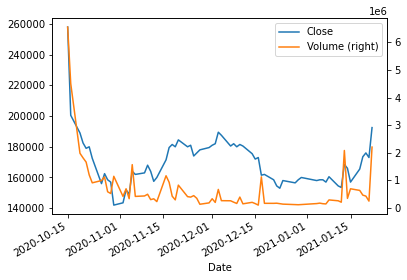

In [93]:
# secondary_y 옵션을 통한 종가와 거래량에 대한 2축 그래프 그리기
stock_daily[["Close","Volume"]].plot(secondary_y="Volume")

## 과학적 기수법
- 참고 : E notation 과학적 기수법 - 위키백과, 우리 모두의 백과사전

과학적 기수법, 과학적 표기법(scientific notation, scientific form, standard index form, standard form)은 너무 크거나 너무 작은 숫자들을 십진법으로 편하게 작성하여 표현하는 방법이다. 과학자, 수학자, 공학자들이 공통적으로 사용하는데, 부분적인 이유는 특정한 산술을 단순화시켜 주기 때문이다. 과학 계산기에서는 "SCI" 디스플레이 모드라는 이름으로 알려져 있다.